# Exercise for the 3rd course week

## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list() 
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## Ex 2 Exceptions (extra)
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

## Ex 3 Plotting (extra)
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)

# Ex 1 Classes

In [1]:
from modules.Week3 import student
student.make_students(50)

In [2]:
students = student.read_students(False)
print(students[0].data_sheet.get_grades())
print(students[0].get_avg_grade())

[' None', ' 2', ' 2', ' None', ' 12', ' 2', ' None', ' 10', ' None', ' None', ' None', ' None', ' None', ' 2', ' None']
2.0


In [3]:
for stud in students: print(stud.name, stud.get_avg_grade())

Mala 2.0
Leland 2.0
Janeta 2.6666666666666665
Melamie 3.0
Malachi 3.0
Lombard 3.1666666666666665
Jamison 3.2
Simon 3.25
Britt 3.3333333333333335
Elita 3.375
Daffie 3.4
Randene 3.4285714285714284
Estel 3.5
Tye 3.6
Esma 3.6
Terencio 3.6666666666666665
Dahlia 3.6666666666666665
Jacquelynn 3.75
Adlai 3.8
Dane 4.0
Garnette 4.0
Ivonne 4.25
Gilberte 4.285714285714286
Leoline 4.333333333333333
Fayette 4.333333333333333
Kynthia 4.333333333333333
Reginauld 4.333333333333333
Neils 4.4
Ban 4.4
Faulkner 4.5
Stella 4.5
Gerry 4.625
Veronica 4.666666666666667
Brianne 4.714285714285714
Ariadne 4.8
Dall 4.8
Fairlie 4.833333333333333
Rani 5.0
Gwyn 5.0
Lonna 5.0
Malachi 5.0
Dee 5.142857142857143
Pascal 5.2
Urson 5.2
Bessie 5.333333333333333
Elane 5.333333333333333
Leticia 5.5
Dee 6.0
Stefa 6.0
Bliss 6.25


['Mala', 'Leland', 'Janeta', 'Melamie', 'Malachi', 'Lombard', 'Jamison', 'Simon', 'Britt', 'Elita', 'Daffie', 'Randene', 'Estel', 'Tye', 'Esma', 'Terencio', 'Dahlia', 'Jacquelynn', 'Adlai', 'Dane', 'Garnette', 'Ivonne', 'Gilberte', 'Leoline', 'Fayette', 'Kynthia', 'Reginauld', 'Neils', 'Ban', 'Faulkner', 'Stella', 'Gerry', 'Veronica', 'Brianne', 'Ariadne', 'Dall', 'Fairlie', 'Rani', 'Gwyn', 'Lonna', 'Malachi', 'Dee', 'Pascal', 'Urson', 'Bessie', 'Elane', 'Leticia', 'Dee', 'Stefa', 'Bliss']


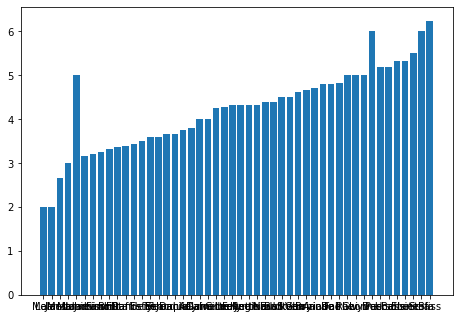

In [4]:
import matplotlib.pyplot as plt
studs = [{s.name, s.get_avg_grade()} for s in students]
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
grades = [s.get_avg_grade() for s in students]
stud_names = [s.name for s in students]
ax.bar(stud_names, grades)

print(stud_names)
# 
# grades = ['C', 'C++', 'Java', 'Python', 'PHP']
# stud_names = [s.name for s in students]
# 
plt.show()

In [5]:
print(str(students[0].get_progression()) + '%')

46.666666666666664%


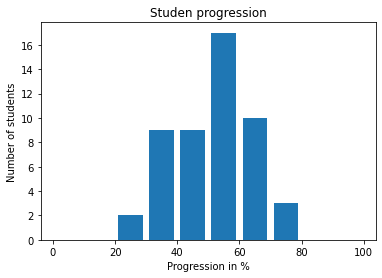

In [10]:
studs = [stud.get_progression() for stud in students]

procent = [0,10,20,30,40,50,60,70,80,90,100]

plt.hist(studs, procent, histtype='bar', rwidth=0.8)

plt.xlabel('Progression in %')
plt.ylabel('Number of students')
plt.title('Studen progression')
plt.show()

# Ex 3

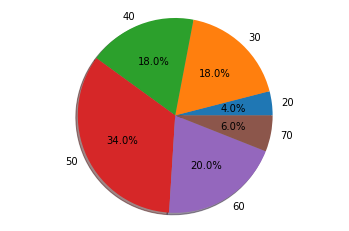

In [42]:
def make_char(students_arr):
    procent = [0,10,20,30,40,50,60,70,80,90,100]
    res = [0 for v in range(len(procent))]
    for stud in students_arr:
       res[int(stud.get_progression() / 10)] +=1 
    
    labels = [i * 10 for i in range(len(procent)) if res[i] != 0]
    sizes = [r for r in res if r != 0]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


make_char(students)